In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv("Dataset.csv")
df['Extra_Curricular'] = df['Extra_Curricular'].map({'Yes': 1, 'No': 0})


In [28]:
X = df[['Hours_Studied', 'Attendance_Percentage', 'Previous_Score', 'Extra_Curricular']]
y = df['Final_Score']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [31]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coeffi:", dict(zip(X.columns, model.coef_)))


R² Score: 0.996872502994502
MSE: 0.7636096688623909
Intercept: -2.2820417383605758
Coeffi: {'Hours_Studied': np.float64(-0.6295760069379717), 'Attendance_Percentage': np.float64(0.04226921195184019), 'Previous_Score': np.float64(1.0600761403490868), 'Extra_Curricular': np.float64(1.2790220308401459)}


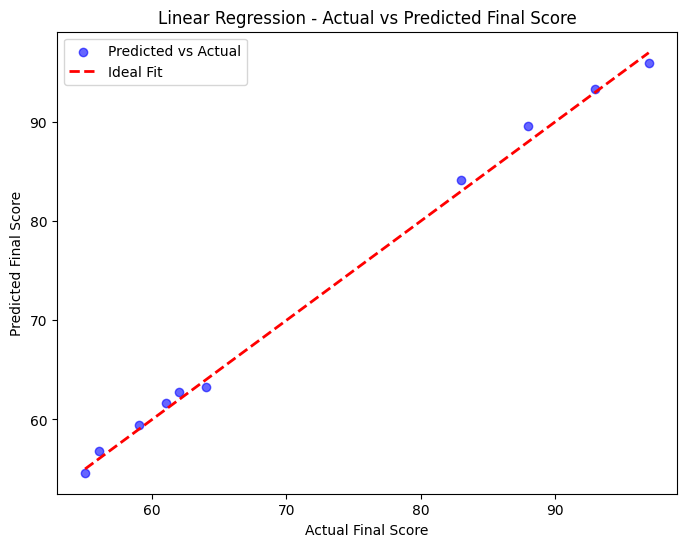

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Ideal Fit")
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Linear Regression - Actual vs Predicted Final Score")
plt.legend()
plt.show()


In [34]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [35]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [36]:
y_pred_poly = poly_model.predict(X_test_poly)

print("Polynomial Regression (Degree=2)")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression (Degree=2)
R² Score: 0.9969286568174639
MSE: 0.7498991514480164


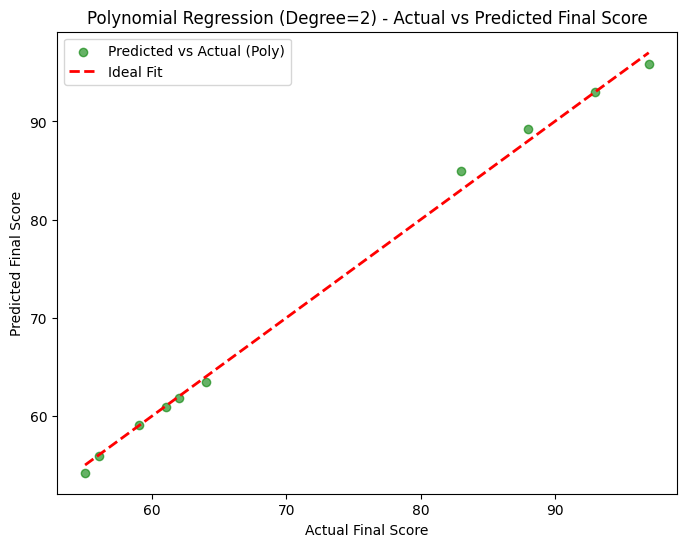

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color="green", alpha=0.6, label="Predicted vs Actual (Poly)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Ideal Fit")
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Polynomial Regression (Degree=2) - Actual vs Predicted Final Score")
plt.legend()
plt.show()
